In [83]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score

pd.options.mode.chained_assignment = None

In this homework your task will be to modify `DecisionTreeClassifier` class from your practice in class.

### Task 1 (0.5 points) <br/>

Download Telecom Data To Analyse The Churn Data Set `telecom_churn.csv`. Read it using `pandas.read_csv()` function. To open the function description use `Shift` + `Tab` . Show the first 5 rows of the dataset using `pandas.DataFrame.head()` function.

[Dataset Information](https://www.kaggle.com/spscientist/telecom-data/download):

Columns:
* state (State letter code)
* account length (How long the client has been served by the company)
* area code (Phone number prefix)
* phone number
* international plan (International roaming (connected / not connected))
* voice mail plan (Voice mail (connected / not connected))
* number vmail messages (Number of voice messages)
* total day minutes (Total duration of conversations during the day)
* total day calls (Total calls during the day)
* total day charge (Total amount of payment for services during the day)
* total eve minutes (Total duration of conversations in the evening)
* total eve calls (Total number of calls in the evening)
* total eve charge (Total amount of payment for services in the evening)
* total night minutes (Total duration of conversations at night)
* total night calls (Total number of calls at night)
* total night charge (Total amount of payment for services at night)
* total intl minutes (Total duration of international calls)
* total intl calls (Total number of international call)
* total intl charge (Total payment for international calls)
* customer service calls (The number of calls to the service center)
* churn

Churn is target: True - client has left.

In [84]:
data = pd.read_csv('telecom_churn.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


* Which features are categorical? 
* Which features can be considered as object ID? Should we keep them? Why?

In [85]:
def find_categorical(data):
    for name in data.columns:
        s = f'{name}: '
        if type(data[name][0]) == str:
            s += 'строка; '
        if data[name].nunique() <= 3:
            s += f'мало уникальных значений; '
        if s != f'{name}: ':
            print(s)
find_categorical(data)

state: строка; 
area code: мало уникальных значений; 
phone number: строка; 
international plan: строка; мало уникальных значений; 
voice mail plan: строка; мало уникальных значений; 
churn: мало уникальных значений; 


In [86]:
cat_features = ['state', 'area code', 'international plan', 'voice mail plan']

### Task 2 (0.5 points) <br/>

The target column for classification is `Churn`. However, it is categorical feature, so you need to encode this by `0` and `1` values (False = 0, True = 1). Implement this mapping.

In [87]:
data.churn = data.churn.map(lambda x: 1 if x else 0)
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Create matrix `X` and vector of labels `y`. Split them into train and test samples using `sklearn.model_selection.train_test_split()` function from scikit-learn library. Also, set up random state in the function `random_state=42`.

Expected output dataframes names: `df_X_train`, `df_X_test` и `y_train`, `y_test`

In [88]:
X = data.drop(['churn'], axis=1)
y = data.churn

from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [79]:
# Check your result
assert(round(X_test.size/X.size, 1)==0.2)
assert(round(y_test.size/y.size, 1)==0.2)

### Task 3 (2 points) categorical feature encoding

Use (0, 1) for binary features. Replace values both for `df_X_train` and `df_X_test`

In [80]:
for cat_name in cat_features:
    if data[cat_name].nunique() == 2:
        print(f'{cat_name} - 2 уникальных значения')

international plan - 2 уникальных значения
voice mail plan - 2 уникальных значения


In [81]:
X_all = (X_train, X_test)
for X in X_all:
    X['international plan'] = X['international plan'].map({'yes': 1, 'no': 0})
    X['voice mail plan'] = X['voice mail plan'].map({'yes': 1, 'no': 0})

In [70]:
X_test.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
438,0.116883,113,0.148810,352-6573,0,0,0,155.0,93,26.35,330.6,106,28.10,189.4,123,8.52,13.5,3,3.65,1
2674,0.086207,67,0.142598,369-4377,0,0,0,109.1,117,18.55,217.4,124,18.48,188.4,141,8.48,12.8,6,3.46,0
1345,0.133333,98,0.142598,392-2555,0,0,0,0.0,0,0.00,159.6,130,13.57,167.1,88,7.52,6.8,1,1.84,4
1957,0.135593,147,0.145585,396-2945,0,0,0,212.8,79,36.18,204.1,91,17.35,156.2,113,7.03,10.2,2,2.75,1
2148,0.116883,96,0.145585,329-2045,0,0,0,144.0,102,24.48,224.7,73,19.10,227.7,91,10.25,10.0,7,2.70,1


Now, let's implement target encoding for other categorical features. For this task we propose you to implement the simpliest form of target encoding, which goes as following:

Training:
* Consider categorical feature $f$
* For each category $c$ in this feature calculate mean value of target feature $y$: $v_c$

Application:
* Consider feature $f$
* Replace each category $c$ with $v_c$
* If $v_c$ is not calculated (possible new category) - replace $c$ with global target mean

Create the next funсtions:
* `learn_target_encoding `
    * Input: train dataframe, target array, list of features names for encoding
    * Output: nested dict with mapping from category to target encoded value for each categorical feature, global target mean value
* `apply_target_encoding`
    * Input: dataframe, encoding_dict
    * Output: transformed dataframe in form of numpy array

HINT for pandas:
* `df.groupby(..)`
* `df.column.to_dict(..)`
* `df.column.replace(some_dict)`

In [135]:
def learn_target_encoding(df_input, y_input, features2encode):    
    encoding_dict = {}
    df_input['target'] = y_input
    target_col = 'target'
    for features in features2encode:
        cat_data = df_input[[features, target_col]].groupby([features]).mean().reset_index()
        cat2target_av = dict(zip(cat_data[features], cat_data[target_col]))
        encoding_dict[features] = cat2target_av   
    target_mean = df_input.target.mean()
    return encoding_dict, target_mean

def apply_target_encoding(df_input, encoding_dict, global_mean):    
    df_output = df_input.copy()
    for column_name, encoding in list(encoding_dict.items()):
        df_output[column_name] = df_input[column_name].map(
            lambda x: encoding_dict[column_name][x] if x in encoding_dict[column_name] else global_mean)
    return df_output

In [136]:
enc , mean = learn_target_encoding(X_train, y, ['area code', 'state'])
f = apply_target_encoding(X_train, enc, mean)

In [137]:
X_train

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,target
817,UT,243,510,355-9360,no,no,0,95.5,92,16.24,...,63,13.91,264.2,118,11.89,6.6,6,1.78,2,0
1373,SC,108,415,399-6233,no,no,0,112.0,105,19.04,...,110,16.46,208.9,93,9.40,4.1,4,1.11,4,1
679,TX,75,415,384-2372,yes,no,0,222.4,78,37.81,...,111,27.80,208.0,104,9.36,8.7,9,2.35,1,1
56,CO,141,415,340-5121,no,no,0,126.9,98,21.57,...,62,15.30,140.8,128,6.34,8.0,2,2.16,1,0
1993,IN,86,510,357-7893,no,no,0,216.3,96,36.77,...,77,22.64,214.0,110,9.63,4.5,3,1.22,0,0
1818,DE,78,408,328-9006,no,no,0,139.2,140,23.66,...,113,16.27,286.5,125,12.89,11.8,3,3.19,3,0
2248,CT,152,408,354-7077,no,yes,20,239.1,105,40.65,...,111,17.77,268.2,130,12.07,13.3,3,3.59,5,0
2899,MA,80,408,337-7879,no,yes,36,190.3,115,32.35,...,78,21.81,214.9,145,9.67,3.8,4,1.03,1,0
468,AZ,86,415,392-2381,no,yes,32,70.9,163,12.05,...,121,14.17,244.9,105,11.02,11.1,5,3.00,3,0
2110,CT,102,415,421-6694,no,yes,25,137.4,100,23.36,...,83,15.02,188.2,93,8.47,10.2,6,2.75,2,0


### Task 5 (1 point) <br/>

Fit `DecisionTreeClassifier` from you practice in class with this sample. Find the best parameters. What is `accuracy` of the classification on the test sample?  

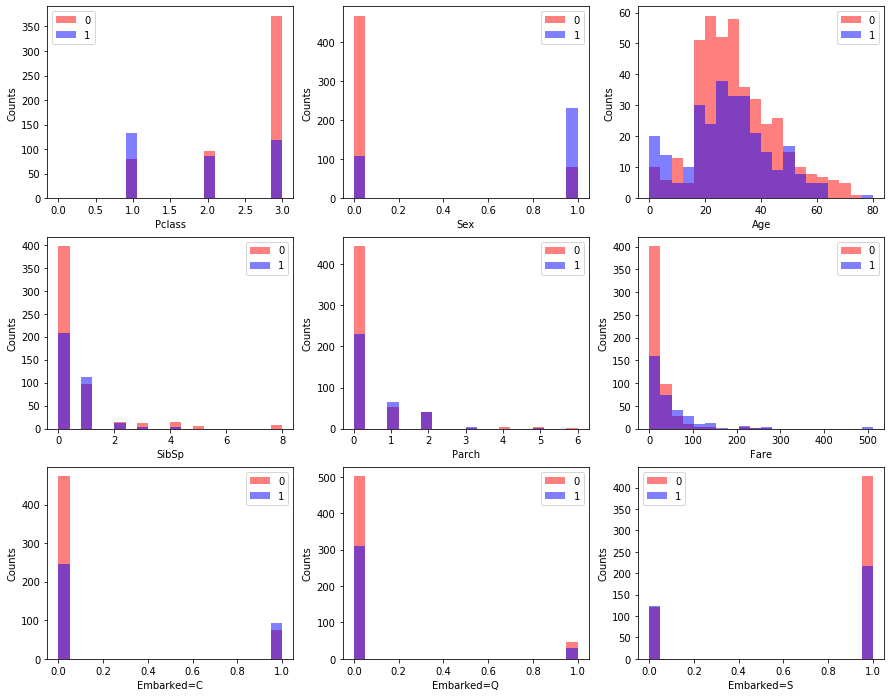

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.3 µs
Test accuracy of DT classifier:  0.7325842696629213
Test accuracy of DT classifier:  0.7842696629213484


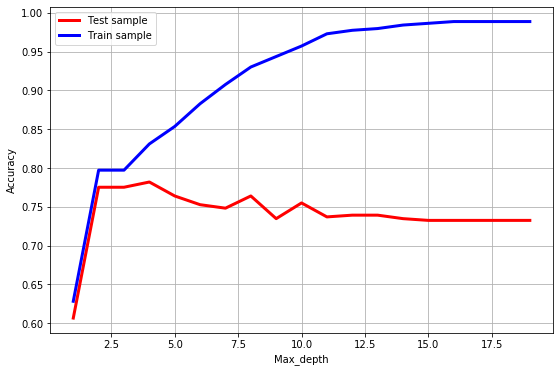

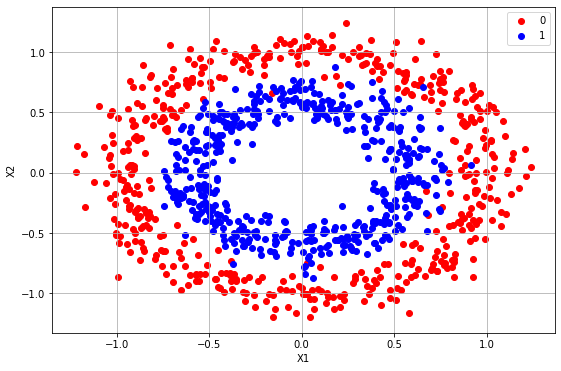

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs
Test accuracy of DT classifier:  0.916


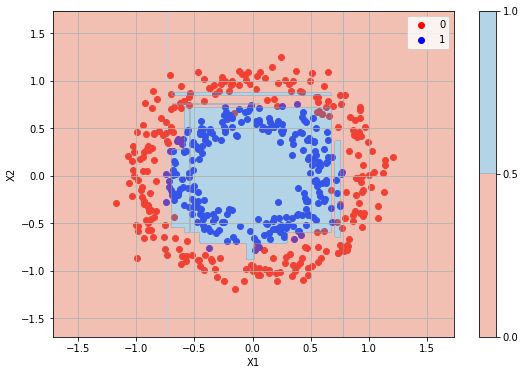

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs
Test accuracy of DT classifier:  0.972


In [13]:
%run seminar3-trees.ipynb

In [43]:
model_tree = DecisionTreeClassifier(max_depth=3)

In [44]:
model_tree.fit(X_train, y_train)

In [45]:
print(f'accur: {accuracy_score(model_tree.predict(X_test), y_test)}')
print(f'roc_auc: {roc_auc_score(model_tree.predict(X_test), y_test)}')

accur: 0.72
roc_auc: 0.7768510504366984


### Task 6 (3 points) <br/>

Implement feature importance estimation in `DecisionTreeClassifier`. Importance of a feature $f$ is defined as follows:

* Let $T(f)$ be the set of all nodes, relying on feature $f$ when making split.
* Efficiency of split at node $t$: $\Delta I(t)=I(t)-\sum_{c\in childen(t)}\frac{n_{c}}{n_{t}}I(c)$,  where $n_t$, $n_c$ is number of samples in nodes t, c
* Feature importance of $f$: $\sum_{t\in T(f)}n_{t}\Delta I(t)$, where $n_t$ is number of samples in node t

Calculate importance of input features in your dataset. What features are the most important (informative) for the classification?

To do this you have to update your decision_tree learning procedure:
* Return best_information_gain from best_split
* Save best_information_gain in node
* Traverse tree recursively and caclulate feature importance for every feature.

In [ ]:
# Your code here
# Output: array 'features_order' from highest to lowest importance (first 5)

In [ ]:
assert(len(features_order)==5)
assert(np.array_equal(features_order, np.array(['total day charge', 'customer service calls', 'international plan', 'total intl calls', 'total eve charge'])))

### Task 7 (2 points) <br/>

Implement Reduced Error Pruning in you `DecisionTreeClassifier`. 

Fit the classifier similar to **Task 6** setting up `max_depth=20`. 

Prune this decision tree using test data. 

Create a plot "Accuracy (y-axis) vs Numbers of vertices (x-axis)" for test data.

In [ ]:
# Your code here